Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [2]:
#Importing data from csv file
df = pd.read_csv('Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Summarize data

In [3]:
print('Shape of df:',df.shape)
print(df.info())

Shape of df: (7043, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  

In [31]:
#Identifying null values
df.isnull().sum() 

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

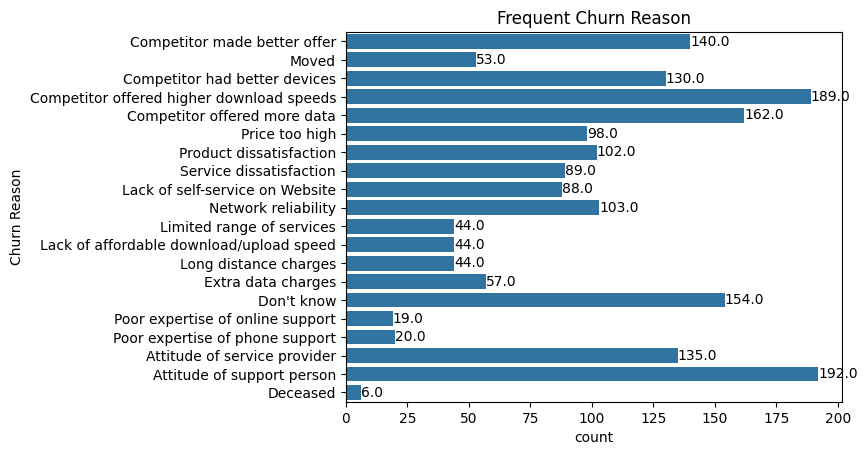

<Figure size 1800x900 with 0 Axes>

In [4]:
#Plotting churn reason by customers for better insights
fig = sns.countplot(data=df,y='Churn Reason')
plt.title('Frequent Churn Reason')
plt.figure(figsize=(18,9))
for bar in fig.patches:
    count=bar.get_width()
    x = count
    y = bar.get_y() + bar.get_height()/2
    fig.text(x,y,str(count),va='center')
plt.show()

It seems like attitude of support person is the reason for churn followed by competitor which have better download speeds meaning that customers are dissatisfied by the support and download speeds offered by the company. 
But Churn Reason is 73.46% null that can not be useful to conclude any information based only on it. Hence it is better to drop such column.

In [5]:
#Deleting some unwanted columns as they will not help in analysis and churn prediction 
df1 = df.copy()

df1.drop(columns=['CustomerID','Count','Zip Code','Lat Long','Latitude','Longitude','Churn Label','Churn Score','Churn Reason'],inplace=True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            7043 non-null   object 
 1   State              7043 non-null   object 
 2   City               7043 non-null   object 
 3   Gender             7043 non-null   object 
 4   Senior Citizen     7043 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 

In [7]:
#Summarizing data statistically
df1.describe() 
#Where is Total Charges? Convert Total charges to float datatype

,Tenure Months,Monthly Charges,Churn Value,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.265370,4400.295755
std,24.559481,30.090047,0.441561,1183.057152
min,0.000000,18.250000,0.000000,2003.000000
25%,9.000000,35.500000,0.000000,3469.000000
50%,29.000000,70.350000,0.000000,4527.000000
75%,55.000000,89.850000,1.000000,5380.500000
max,72.000000,118.750000,1.000000,6500.000000


Type cast & Treat missing values in Total Charges

In [8]:
df1['Total Charges'] = pd.to_numeric(df1['Total Charges'],errors='coerce')
print('Null values:\n',df1.isnull().sum())
df1[df1['Total Charges'].isnull()==True]

Null values:
 Country               0
State                 0
City                  0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Value           0
CLTV                  0
dtype: int64


,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
2234,United States,California,San Bernardino,Female,No,Yes,No,0,No,No phone service,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,2578
2438,United States,California,Independence,Male,No,No,No,0,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0,5504
2568,United States,California,San Mateo,Female,No,Yes,No,0,Yes,No,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,2048
2667,United States,California,Cupertino,Male,No,Yes,Yes,0,Yes,Yes,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0,4950
2856,United States,California,Redcrest,Female,No,Yes,No,0,No,No phone service,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,4740
4331,United States,California,Los Angeles,Male,No,Yes,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0,2019
4687,United States,California,Sun City,Male,No,Yes,Yes,0,Yes,Yes,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0,2299
5104,United States,California,Ben Lomond,Female,No,Yes,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0,3763
5719,United States,California,La Verne,Male,No,Yes,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0,4890
6772,United States,California,Bell,Female,No,Yes,Yes,0,Yes,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0,2342


In [9]:
#Replacing null values with mean of total charges
mean = round(df1['Total Charges'].mean(),2)
print('Mean of Total Charges:',mean)

df1['Total Charges'] = df1['Total Charges'].fillna(mean)
print(df1.isnull().sum())
df1.describe()

Mean of Total Charges: 2283.3
Country              0
State                0
City                 0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
CLTV                 0
dtype: int64


,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300440,0.265370,4400.295755
std,24.559481,30.090047,2265.000258,0.441561,1183.057152
min,0.000000,18.250000,18.800000,0.000000,2003.000000
25%,9.000000,35.500000,402.225000,0.000000,3469.000000
50%,29.000000,70.350000,1400.550000,0.000000,4527.000000
75%,55.000000,89.850000,3786.600000,1.000000,5380.500000
max,72.000000,118.750000,8684.800000,1.000000,6500.000000


75% customers have tenure more than 55 months and 25% customers pay more than 89.85 as monthlycharges

Outliers Identification

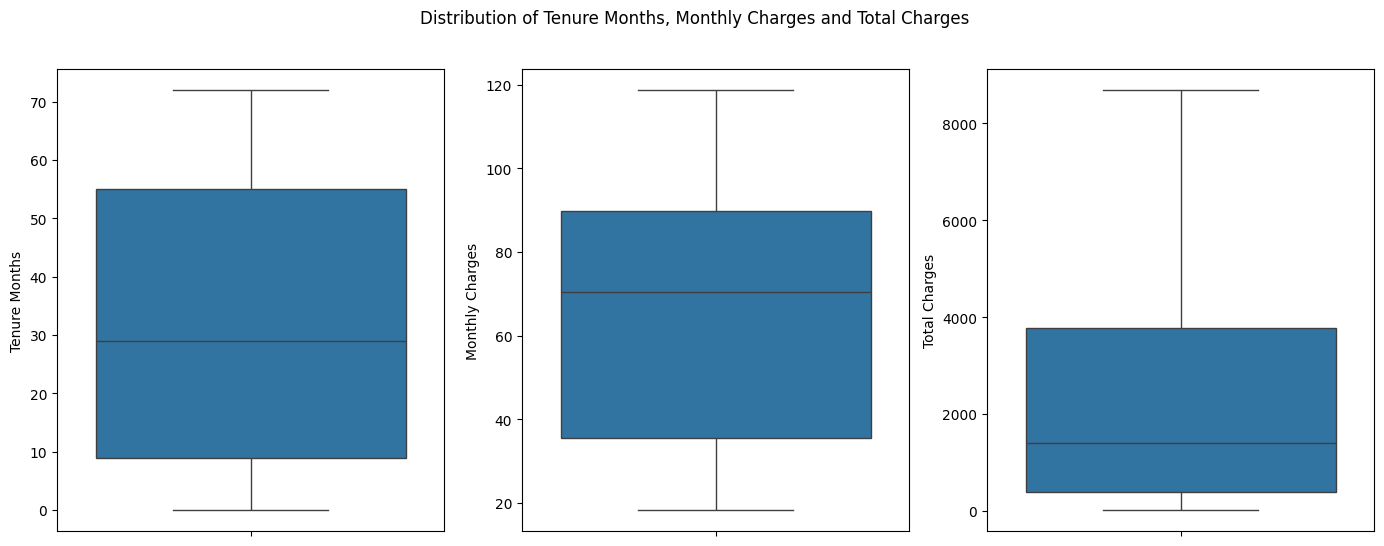

In [10]:
#Detecting outliers for monthly charges, total charges and tenure
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(17,6))
sns.boxplot(df1['Tenure Months'],ax=ax1)
sns.boxplot(df1['Monthly Charges'],ax=ax2)
sns.boxplot(df1['Total Charges'],ax=ax3)
fig.suptitle('Distribution of Tenure Months, Monthly Charges and Total Charges')
plt.show() 

No outliers are detected but Total Charges has positively skewed data which can mislead the ML model learning process. So, application of column transformation can significanlty reduce the skewness

Skewness: 0.96


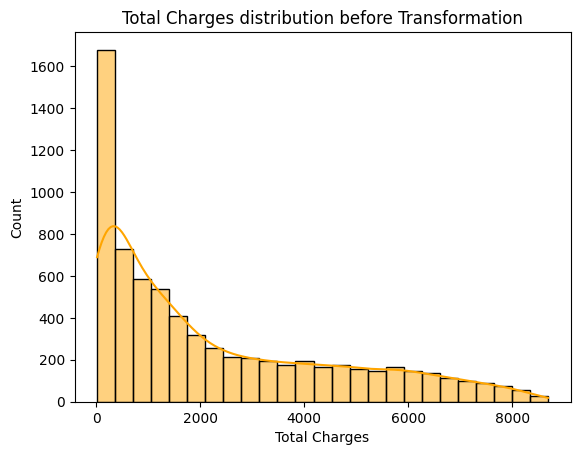

In [11]:
#Visualizing skewness in Total Charges 
totalcharges_skew = round(df1['Total Charges'].skew(),2)
print('Skewness:',totalcharges_skew)
sns.histplot(data=df1, x='Total Charges',kde=True, color='orange')
plt.title('Total Charges distribution before Transformation')
plt.show() #Skewness is towards 1 and hence it is positively skewed.

Square Root Transformation for Total Charges

Skewness: 0.30784903212979264


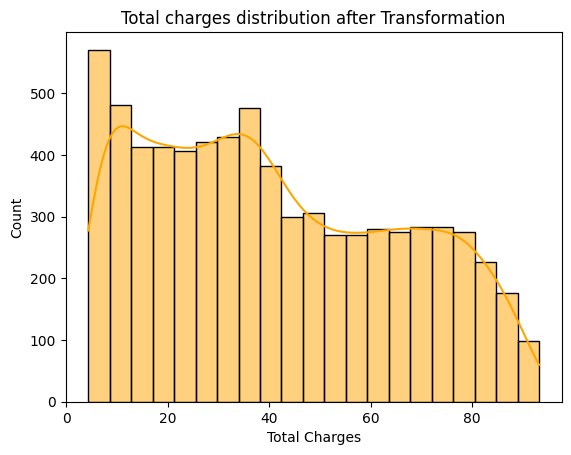

In [12]:
#Fixing positively skewed total charges data
df1['Total Charges']=np.sqrt(df1['Total Charges'])
print('Skewness:',df1['Total Charges'].skew())
sns.histplot(data=df1, x='Total Charges',kde=True, color='orange')
plt.title('Total charges distribution after Transformation')
plt.show()

Visualization of CLTV Distribution

Skewness: -0.3116021004049801


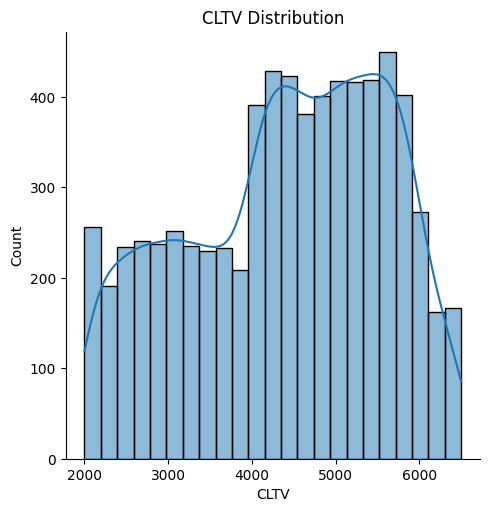

In [13]:
print('Skewness:',df1['CLTV'].skew())
sns.displot(data=df1,x='CLTV',kde=True)
plt.title('CLTV Distribution')
plt.show() 

High value customers are more in the given dataset

In [14]:
#Evaluating unique values in customer demographics
print('Country:',df1['Country'].nunique())
print('States:',df1['State'].nunique())
print('Cities:',df1['City'].nunique())

# Remove country,state and city features from the data as they are not required to predict churn value in this case. 
df1.drop(columns=['Country','State','City'],inplace=True)

Country: 1
States: 1
Cities: 1129


In [15]:
#Calculating total number of churned customers
print('Number of churned customers:',df1['Churn Value'].value_counts()) 

Number of churned customers: Churn Value
0    5174
1    1869
Name: count, dtype: int64


The data is imbalanced in case of churned customers i.e. 73.46% data contributes to non churned customers and remaining 26.54% only belongs to churned customers.

Bivariate & Statistical Analysis

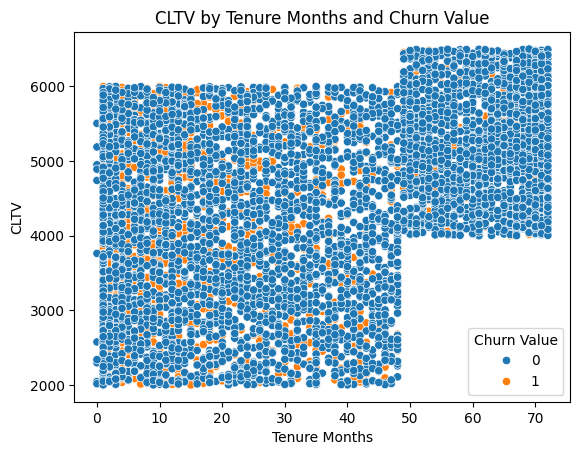

In [16]:
#Visualizing CLTV patterns across Tenure Months along with Churn Value
sns.scatterplot(data=df1,x='Tenure Months',y='CLTV',hue='Churn Value')
plt.title('CLTV by Tenure Months and Churn Value')
plt.show()

As observed, customers are churned in the initial months,including customers with high CLTV. However top right corner data points i.e. customers with tenure more than 50 and CLTV more than 6000 indicates customers with long term relationship.

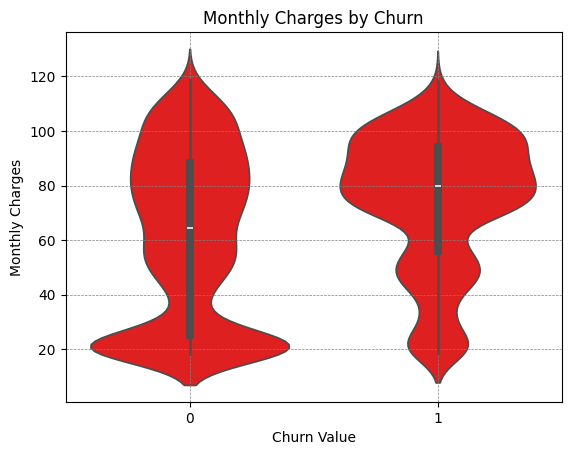

In [17]:
#Visualizing relation between monthly charges and churn
sns.violinplot(data=df1,x=df1['Churn Value'],y=df1['Monthly Charges'],color='red')
plt.grid(color = 'grey',linestyle= '--',linewidth=0.5)
plt.title('Monthly Charges by Churn')
plt.show() 

Most of the customers did not churn when monthly charges are low but when monthly charges increased over 60, customers are preferred to churn

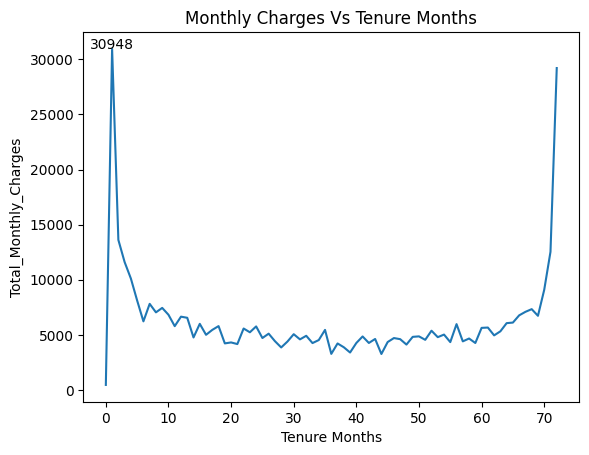

In [ ]:
#How are the monthly charges distributed according to tenure months?
monthly_charges= df1['Monthly Charges'].groupby(df1['Tenure Months']).sum()
plt.plot(monthly_charges)
highest_value= monthly_charges.values.max()
highest_index = monthly_charges.idxmax()
plt.text(highest_index,highest_value,round(highest_value),ha='center')
plt.title('Monthly Charges Vs Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Total_Monthly_Charges')
plt.show() 

It seems like monthly charges are significantly higher at the beginning and at the end. At the initial stages, it can be too much for early customers to continue with the services which can lead to high churn risk at the beginning only. 

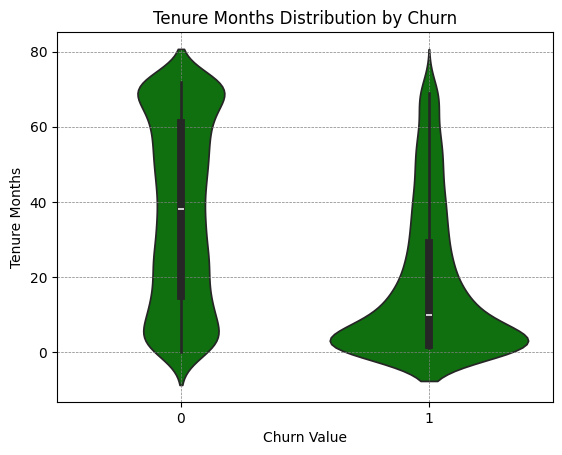

In [19]:
#Visualizing customer retention period
sns.violinplot(data=df1,x=df1['Churn Value'],y=df1['Tenure Months'],color='green')
plt.title('Tenure Months Distribution by Churn')
plt.grid(color = 'grey',linestyle= '--',linewidth=0.5)
plt.show() 

As it is expected, churned customers are concentrated at initial months only. 

In [20]:
#Identifying customer retention months 
churn_months = pd.pivot_table(df1,columns='Churn Value',index= 'Tenure Months',aggfunc='size')
churn_months

Churn Value,0,1
Tenure Months,,
0,11.0,NaN
1,233.0,380.0
2,115.0,123.0
3,106.0,94.0
4,93.0,83.0
...,...,...
68,91.0,9.0
69,87.0,8.0
70,108.0,11.0


Around 52% churn is observed within 10 months of tenure among total churn

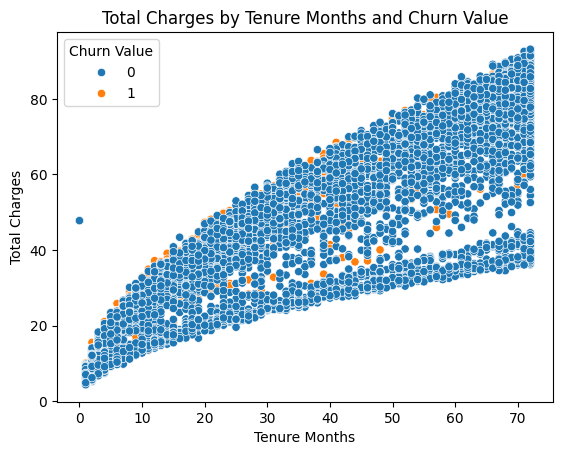

In [21]:
#Analysing relation between Tenure months and total Charges by Churn Value
sns.scatterplot(data=df1,x='Tenure Months',y='Total Charges',hue='Churn Value')
plt.title('Total Charges by Tenure Months and Churn Value')
plt.show() 

Total charges are linearly associated with Tenure months while no significant pattern observed for churned customers

Text(0, 0.5, 'Churn Frequency')

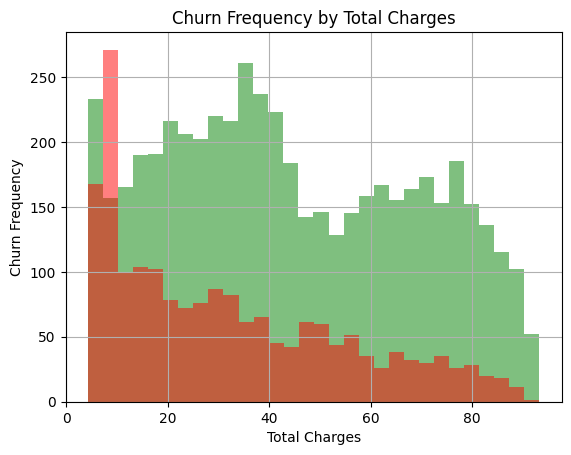

In [22]:
#So is there any relation between total charges and churn value?
df1[df1['Churn Value']==0]['Total Charges'].hist(bins=30,color='green',alpha=0.5)
df1[df1['Churn Value']==1]['Total Charges'].hist(bins=30,color='red',alpha=0.5)
plt.title('Churn Frequency by Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Churn Frequency')

Here customers are preferred to churn at lower range of total charges which is bit confusing to understand the behavior of churned customers 

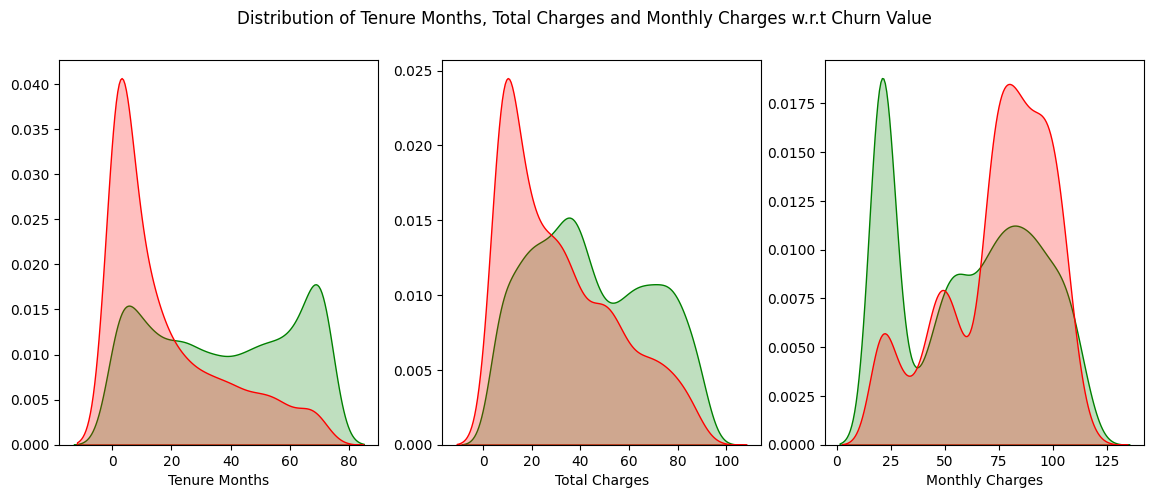

In [24]:
#Analyzing Monthly Charges, tenure months and total charges w.r.t Churn value
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,5))
sns.kdeplot(df1[df1['Churn Value']==0]['Tenure Months'],color='Green',shade=True,ax=ax1)
sns.kdeplot(df1[df1['Churn Value']==1]['Tenure Months'],color='Red',shade=True,ax=ax1)
sns.kdeplot(df1[df1['Churn Value']==0]['Total Charges'],color='Green',shade=True,ax=ax2)
sns.kdeplot(df1[df1['Churn Value']==1]['Total Charges'],color='Red',shade=True,ax=ax2)
sns.kdeplot(df1[df1['Churn Value']==0]['Monthly Charges'],color='Green',shade=True,ax=ax3)
sns.kdeplot(df1[df1['Churn Value']==1]['Monthly Charges'],color='Red',shade=True,ax=ax3)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
plt.suptitle('Distribution of Tenure Months, Total Charges and Monthly Charges w.r.t Churn Value')
plt.show()

When analysis of Tenure Months, Total Charges and Monthly Charges are done together, it is clearer now that early tenure months, low total charges and high monthly charges are linked to churned customers.

Contract        Month-to-month  One year  Two year
Senior Citizen                                    
No                        3068      1283      1550
Yes                        807       190       145


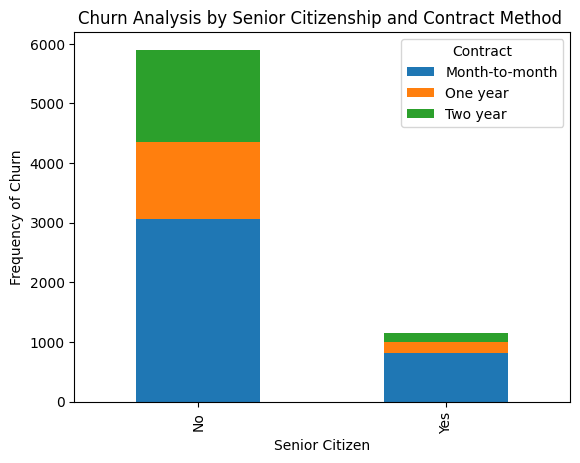

In [25]:
#Analysing which customers have preferred to churn senior citizen-wise and in what contract method they have churned
churn_customers = pd.pivot_table(df1, index='Senior Citizen',columns='Contract',aggfunc='count',values='Churn Value')
print(churn_customers) 

#Visualizing the table
churn_customers.plot(kind='bar',stacked=True)
plt.title('Churn Analysis by Senior Citizenship and Contract Method ')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency of Churn')
plt.show() 

Month-to-month contract has significantly caused churned customers. Non senior citizens are highly dissatisfied especially in the services provided in month-to-month contract.

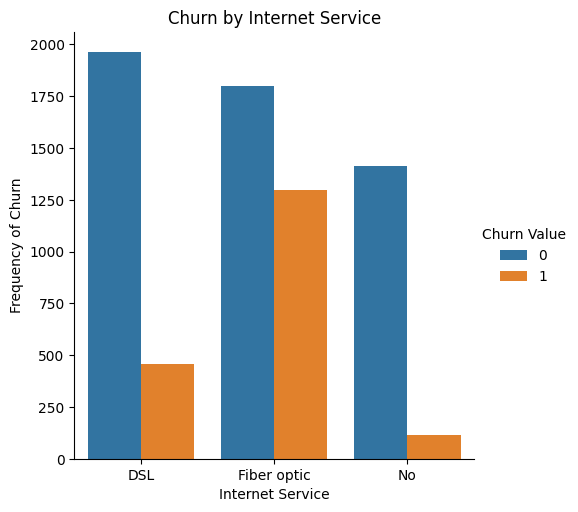

In [26]:
#Visualizing churn trend in Internet Services
sns.catplot(data=df1, x='Internet Service', kind='count',hue='Churn Value')
plt.title('Churn by Internet Service')
plt.ylabel('Frequency of Churn')
plt.show() 

Fiber Optic service has faced more churned customers than other internet services. It means customers are disappointed  with fiber optic services linking to poor download speeds issue.

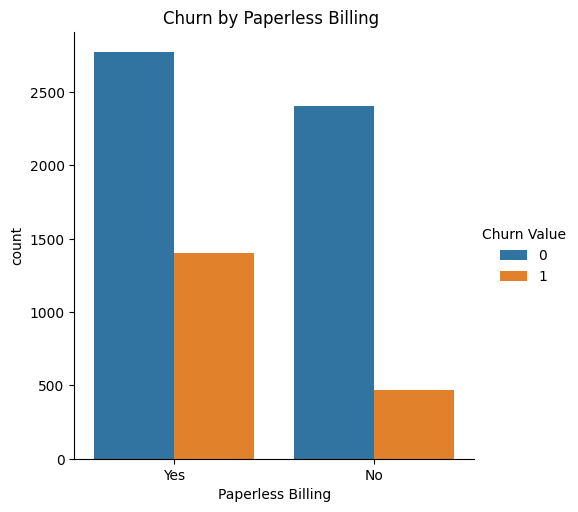

In [27]:
#Effect of paperless billing on churn process
churn_billing = sns.catplot(data=df1,x='Paperless Billing',kind='count',hue='Churn Value')
plt.title('Churn by Paperless Billing ')
plt.show()

There might be issue in paperless billing because it has contributed more in churn process than without paperless billing.

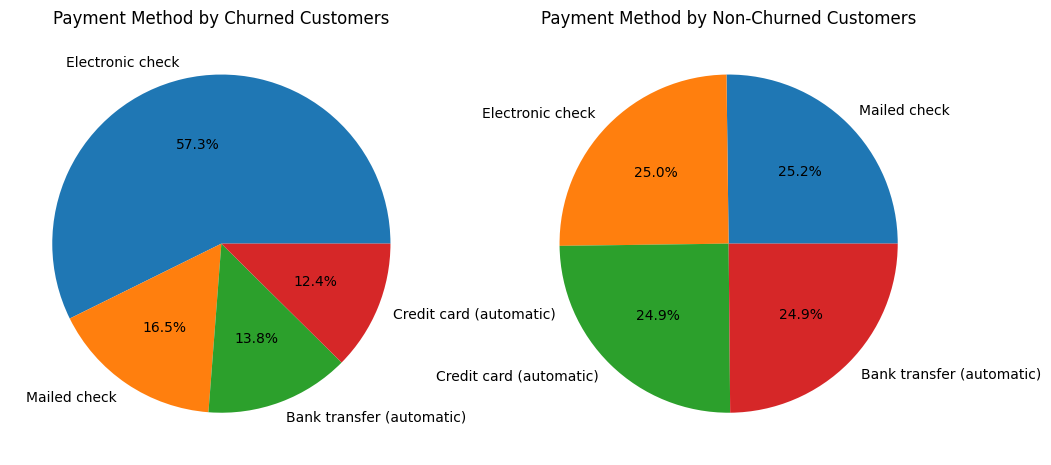

In [ ]:
#How payment method varies with churn value
churned_payment = df1[df1['Churn Value']==1]['Payment Method'].value_counts()
non_churned_payment = df1[df1['Churn Value']==0]['Payment Method'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,10))
churned_payment.plot(kind='pie',autopct='%1.1f%%',ax=ax1)
non_churned_payment.plot(kind='pie',autopct='%1.1f%%',ax=ax2)
ax1.set_title("Payment Method by Churned Customers")
ax2.set_title("Payment Method by Non-Churned Customers")
ax1.set_ylabel('') 
ax2.set_ylabel('')
plt.show() 


57.3% customers who were churned had electronic check as payment method.

Statistical Analysis of features with churn value

In [29]:
#Is there is relation of customer demographics features with churn value? Running chi-square test of independance to check the relation
columns = ['Gender','Partner','Dependents']
from scipy.stats import chi2_contingency
#Null hypothesis = There is no significant relation between column and target.
#Alternate hypothesis = There is significant relation between column and target.
alpha=0.05
for col in columns:
    contingency_table = pd.crosstab(df1['Churn Value'],df1[col])
    chi2,p,dof,expected_freq = chi2_contingency(contingency_table)
    print(f'Chi2 Test for Churn Value and {col}')
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    if p < alpha:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')
    print("_"*20) 

Chi2 Test for Churn Value and Gender
Chi-square statistic: 0.4840828822091383
P-value: 0.48657873605618596
Degrees of freedom: 1
Fail to reject null hypothesis
____________________
Chi2 Test for Churn Value and Partner
Chi-square statistic: 158.7333820309922
P-value: 2.1399113440759935e-36
Degrees of freedom: 1
Reject null hypothesis
____________________
Chi2 Test for Churn Value and Dependents
Chi-square statistic: 433.7343787644573
P-value: 2.5009723998553557e-96
Degrees of freedom: 1
Reject null hypothesis
____________________


In [30]:
#Since gender is not significantly important to churn value, we will drop the column
df1.drop(columns='Gender',inplace=True) 

In [31]:
#Similarly we will check the significant relations of services with churn value
columns = ['Phone Service','Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV', 'Streaming Movies',]
#Null hypothesis = There is no significant relation between column and target.
#Alternate hypothesis = There is significant relation between column and target.
alpha=0.05
for col in columns:
    contingency_table = pd.crosstab(df1['Churn Value'],df1[col])
    chi2,p,dof,expected_freq = chi2_contingency(contingency_table)
    print(f'Chi2 Test for Churn Value and {col}')
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    if p < alpha:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')
    print("_"*20) 


Chi2 Test for Churn Value and Phone Service
Chi-square statistic: 0.9150329892546948
P-value: 0.3387825358066928
Degrees of freedom: 1
Fail to reject null hypothesis
____________________
Chi2 Test for Churn Value and Multiple Lines
Chi-square statistic: 11.33044148319756
P-value: 0.0034643829548773
Degrees of freedom: 2
Reject null hypothesis
____________________
Chi2 Test for Churn Value and Online Security
Chi-square statistic: 849.9989679615962
P-value: 2.6611496351768565e-185
Degrees of freedom: 2
Reject null hypothesis
____________________
Chi2 Test for Churn Value and Online Backup
Chi-square statistic: 601.8127901134089
P-value: 2.0797592160865457e-131
Degrees of freedom: 2
Reject null hypothesis
____________________
Chi2 Test for Churn Value and Device Protection
Chi-square statistic: 558.419369407389
P-value: 5.505219496457244e-122
Degrees of freedom: 2
Reject null hypothesis
____________________
Chi2 Test for Churn Value and Tech Support
Chi-square statistic: 828.197068458739

In [32]:
#We can drop phone service from dataframe as it is not significantly important to churn value
df1.drop(columns='Phone Service',inplace=True)

At last, summarize modified dataframe again. 

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Partner            7043 non-null   object 
 2   Dependents         7043 non-null   object 
 3   Tenure Months      7043 non-null   int64  
 4   Multiple Lines     7043 non-null   object 
 5   Internet Service   7043 non-null   object 
 6   Online Security    7043 non-null   object 
 7   Online Backup      7043 non-null   object 
 8   Device Protection  7043 non-null   object 
 9   Tech Support       7043 non-null   object 
 10  Streaming TV       7043 non-null   object 
 11  Streaming Movies   7043 non-null   object 
 12  Contract           7043 non-null   object 
 13  Paperless Billing  7043 non-null   object 
 14  Payment Method     7043 non-null   object 
 15  Monthly Charges    7043 non-null   float64
 16  Total Charges      7043 

Save the file

In [34]:
#Saving file 
df1.to_csv('Cleaned_Telco-Customer-Churn.csv',index=False)

Insights:


1. Data is highly imbalanced i.e.73.46% data contributes to non churned customers and remaining 26.54% only belongs to churned customers.
2. 75% customers have tenure less than 55 months.
3. High value and loyal customers have more than 50 tenure months and 6000+ CLTV
4. 52% churn occured within 10 months of tenure
5. Low tenure, high monthly charges  and lower total charges are observed as churn pattern across the customers
6. Month-to-month contract, Fiber optic as an Internet service and paperless billing has contributed more in churn.
7. It is observed that payment method electronic check caused 57.3% churn in the customers
8. Potential causes of churn can be higher initial monthly charges, better and latest/advanced services provided by the competitor. 

Recommendations:
1. Reduce initial monthly charges by 70-75%
2. As non-senior citizens are highly dissatisfied, implement better and advanced services such higher download speeds with good tech support.
3. Identify potential issues in month-to-month contract by taking monthly feedback 
4. Replace the payment method electronic check with simplified and quick methods like mobile payment apps.